<a href="https://colab.research.google.com/github/abhishekY2401/tesla-stock-prediction/blob/main/tesla_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('TSLA', api_key='42bad531172b90ea5a72daf4d974878da5cffe03')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('TSLA.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('TSLA.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-08-14 00:00:00+00:00,363.80,367.66,362.60,364.63,4461215,72.760,73.532,72.520,72.926,22306075,0.0,1.0
1,TSLA,2017-08-15 00:00:00+00:00,362.33,365.49,359.37,365.20,3048074,72.466,73.098,71.874,73.040,15240370,0.0,1.0
2,TSLA,2017-08-16 00:00:00+00:00,362.91,366.50,362.52,363.00,3328576,72.582,73.300,72.504,72.600,16642880,0.0,1.0
3,TSLA,2017-08-17 00:00:00+00:00,351.92,363.30,351.59,361.21,4969222,70.384,72.660,70.318,72.242,24846110,0.0,1.0
4,TSLA,2017-08-18 00:00:00+00:00,347.46,354.00,345.80,352.91,5335793,69.492,70.800,69.160,70.582,26678965,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']
df1

0       363.80
1       362.33
2       362.91
3       351.92
4       347.46
         ...  
1252    925.90
1253    864.51
1254    871.27
1255    850.00
1256    883.07
Name: close, Length: 1257, dtype: float64

In [ ]:
df1.shape

(1257,)

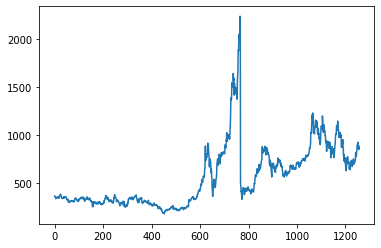

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.08973288],
       [0.08901922],
       [0.0893008 ],
       ...,
       [0.33610386],
       [0.32577751],
       [0.34183262]])

In [ ]:
df1.shape

(1257, 1)

In [ ]:
# splitting data set into training set and test dataset
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0: training_size, :], df1[training_size:len(df1), :1]

In [ ]:
train_data, test_data

(array([[0.08973288],
        [0.08901922],
        [0.0893008 ],
        [0.08396528],
        [0.0818    ],
        [0.07713931],
        [0.07883366],
        [0.08437794],
        [0.08445562],
        [0.08208644],
        [0.08092612],
        [0.08175145],
        [0.08457699],
        [0.08589752],
        [0.08565478],
        [0.08283409],
        [0.08037752],
        [0.08332929],
        [0.07982891],
        [0.08967948],
        [0.08922312],
        [0.09091262],
        [0.09645205],
        [0.09750556],
        [0.10002525],
        [0.09521891],
        [0.09464118],
        [0.09103399],
        [0.08356232],
        [0.08060084],
        [0.08072707],
        [0.07864918],
        [0.07798406],
        [0.07871229],
        [0.07892105],
        [0.08213013],
        [0.08546544],
        [0.08562079],
        [0.0863733 ],
        [0.07960559],
        [0.08574702],
        [0.08526639],
        [0.08579072],
        [0.08573731],
        [0.08332443],
        [0

In [ ]:
import numpy

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1): 
    a = dataset[i: (i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(716, 100)
(716,)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(339, 100)
(339,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Create the Stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 290ms/step - loss: 0.0190 - val_loss: 0.0127
Epoch 2/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0112 - val_loss: 0.0094
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0095 - val_loss: 0.0078
Epoch 4/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0074 - val_loss: 0.0016
Epoch 5/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0065 - val_loss: 0.0015
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0060 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 8/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 10/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0047 - val_lo

In [ ]:
import tensorflow as tf

In [ ]:
# do some prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
# transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# calculate RMSE Performance metrics for trained data set
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

578.0209054895057

In [ ]:
# calculate RMSE Performance metrics for test data set
math.sqrt(mean_squared_error(Y_test, test_predict))

881.9814402075973

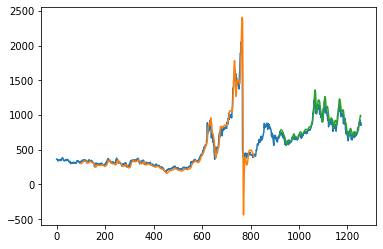

In [ ]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 99)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.3603248890658225,
 0.39567817922302373,
 0.39816873646700124,
 0.4053588247288544,
 0.4037664216566817,
 0.4431881074677877,
 0.44694093543970703,
 0.4442319082620473,
 0.43627474778859865,
 0.4396683140917961,
 0.46921515890046506,
 0.44290652399770836,
 0.42081678625872654,
 0.4263999067861616,
 0.41097592946819556,
 0.3869151074386584,
 0.3922651933701657,
 0.4094612045946654,
 0.3913184903242093,
 0.40068356814805456,
 0.4122673295206284,
 0.38753167814038386,
 0.4028634125974618,
 0.40105253959160675,
 0.3976395537387487,
 0.33860412277039287,
 0.34107526046470976,
 0.3391333054986454,
 0.33585625649341183,
 0.3514792841953995,
 0.35454271815436594,
 0.3755983648739185,
 0.3370796881220324,
 0.33337540902426466,
 0.29524512326559144,
 0.3015224926933944,
 0.2694608162036722,
 0.26654788375457567,
 0.28673936051422966,
 0.2647855596228723,
 0.28286516035693127,
 0.25771684354639807,
 0.25752750293720683,
 0.23542805542339468,
 0.2407684315800716,
 0.21807668780160983,
 0.2329520

In [ ]:
# demonstrate prediction for next 30 days

from numpy import array

lst_output = []
n_steps = 100
i=0

while (i < 30):
  if (len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape(1, n_steps, 1)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]

    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose=0)
    # print(yhat[0])
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1

ValueError: ignored

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
day_new, day_pred

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130]))

In [ ]:
import matplotlib.pyplot as plt


ValueError: ignored

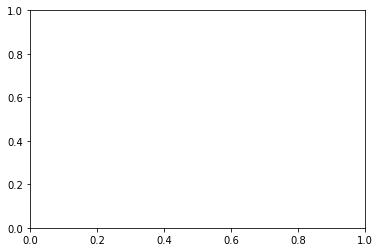

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))